<a href="https://colab.research.google.com/github/Hakimvira/mlProject/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
!pip install kaggle

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import Image, display_svg, SVG
import seaborn as sns


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import Datasets from Kaggle

In [3]:
creds = '{"username":"hakimvira","key":"73c7f0cfe380fbebe0fa74ad1b3e781f"}'

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [4]:
comp = 'house-prices-advanced-regression-techniques'
path = URLs.path(comp)
Path.BASE_PATH = path

In [5]:
from kaggle import api

if not path.exists():
    path.mkdir(parents=true)
    api.competition_download_cli(comp, path=path)
    shutil.unpack_archive(str(path/f'{comp}.zip'), str(path))

path.ls(file_type='text')

100%|██████████| 199k/199k [00:00<00:00, 43.5MB/s]

(#4) [Path('test.csv'),Path('train.csv'),Path('sample_submission.csv'),Path('data_description.txt')]

Read data

In [6]:
df = pd.read_csv(path/'train.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

Clean the data

In [13]:
dep_var = 'SalePrice'
cont_names,cat_names = cont_cat_split(df, dep_var=dep_var)

In [14]:
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(df,
                   procs = procs,
                   splits = splits,
                   cat_names = cat_names,
                   cont_names = cont_names,
                   y_names=dep_var)

In [15]:
to.show(5)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,SalePrice
518,60,RL,Pave,#na#,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,TA,7,Typ,0,#na#,Attchd,RFn,2,TA,TA,Y,0,0,#na#,MnPrv,#na#,5,2007,WD,Normal,True,False,False,519.0,69.0,9531.0,1998.0,1998.0,0.0,706.0,0.0,88.0,794.0,882.0,914.0,0.0,1796.0,1998.0,546.0,0.0,36.0,0.0,-1.776357e-15,0.0,211000
228,20,RL,Pave,#na#,Reg,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,Gable,CompShg,HdBoard,HdBoard,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,0,0,1,0,3,1,TA,5,Typ,1,Fa,Detchd,Unf,1,TA,TA,Y,0,0,#na#,MnPrv,#na#,5,2010,WD,Normal,False,False,False,229.0,70.0,8521.0,1967.0,1967.0,0.0,842.0,0.0,70.0,912.0,912.0,0.0,0.0,912.0,1974.0,336.0,0.0,0.0,0.0,-1.776357e-15,0.0,125000
972,120,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,TwnhsE,1Story,6,5,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,Unf,1,TA,TA,Y,0,0,#na#,#na#,#na#,4,2010,WD,Normal,False,False,False,973.0,55.0,7892.0,1979.0,1979.0,0.0,0.0,0.0,918.0,918.0,918.0,0.0,0.0,918.0,1979.0,264.0,28.0,0.0,0.0,-1.776357e-15,0.0,99500
946,80,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,6,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,Gd,CBlock,TA,TA,Av,ALQ,BLQ,GasA,TA,Y,SBrkr,1,0,1,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,1,TA,TA,Y,0,0,#na#,#na#,#na#,3,2006,WD,Normal,False,False,False,947.0,70.0,8163.0,1959.0,1959.0,128.0,748.0,294.0,102.0,1144.0,1144.0,0.0,0.0,1144.0,1959.0,796.0,86.0,0.0,0.0,-1.776357e-15,0.0,143000
707,120,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,8,5,Hip,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,Fin,2,TA,TA,Y,0,0,#na#,#na#,#na#,12,2009,WD,Normal,False,False,False,708.0,48.0,6240.0,2006.0,2006.0,176.0,863.0,0.0,461.0,1324.0,1324.0,0.0,0.0,1324.0,2006.0,550.0,192.0,38.0,0.0,-1.776357e-15,0.0,254000


Training and testing

In [16]:
xs , y = to.train.xs, to.train.y
valid_xs, valid_y = to.valid.xs, to.valid.y

In [25]:
xs

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
518,6,4,2,0,1,4,1,2,1,6,...,1.279037,-0.116169,0.529951,0.816443,0.337050,-0.771215,-0.151733,-0.364581,-0.272658,-0.089746
228,1,4,2,0,4,4,1,3,1,20,...,-0.814083,-0.116169,-1.159504,-0.180707,-0.648555,-0.771215,-0.703834,-0.364581,-0.272658,-0.089746
972,12,4,2,0,4,4,1,5,1,21,...,-0.814083,-0.116169,-1.148037,0.027033,-0.986476,-0.542356,-0.703834,-0.364581,-0.272658,-0.089746
946,9,4,2,0,4,4,1,5,1,13,...,-0.814083,-0.116169,-0.716117,-0.803926,1.510388,-0.068292,-0.703834,-0.364581,-0.272658,-0.089746
707,12,4,2,0,4,4,1,5,1,17,...,-0.814083,-0.116169,-0.372111,1.148826,0.355823,0.798101,-0.121061,-0.364581,-0.272658,-0.089746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1,4,2,0,4,4,1,5,1,17,...,-0.814083,-0.116169,0.958048,1.273470,1.998497,0.503854,0.124317,-0.364581,-0.272658,-0.089746
1238,1,4,2,0,4,4,1,5,1,21,...,-0.814083,-0.116169,-0.721851,1.107278,0.046062,-0.771215,-0.703834,-0.364581,-0.272658,-0.089746
822,6,4,2,0,1,4,1,1,1,9,...,1.214915,-0.116169,0.409548,1.024182,-0.193299,0.046137,0.032300,-0.364581,-0.272658,-0.089746
724,1,4,2,0,1,4,1,5,1,8,...,-0.814083,-0.116169,0.342658,1.190374,1.378974,1.901526,0.277679,-0.364581,-0.272658,-0.089746


In [17]:
def r_mse(pred,y): 
  return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y): 
  return r_mse(m.predict(xs), y)

In [32]:
def rf(xs, y, n_estimators=40, max_samples=100,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [33]:
m = rf(xs, y,  max_samples=1000);

In [34]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(22076.899981, 29899.319063)

Feature Importance

In [35]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [36]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
14,OverallQual,0.358265
75,GrLivArea,0.144090
46,GarageCars,0.099363
21,ExterQual,0.066028
65,YearBuilt,0.056211
71,TotalBsmtSF,0.043265
68,BsmtFinSF1,0.033073
72,1stFlrSF,0.019372
64,LotArea,0.018402
40,TotRmsAbvGrd,0.017732


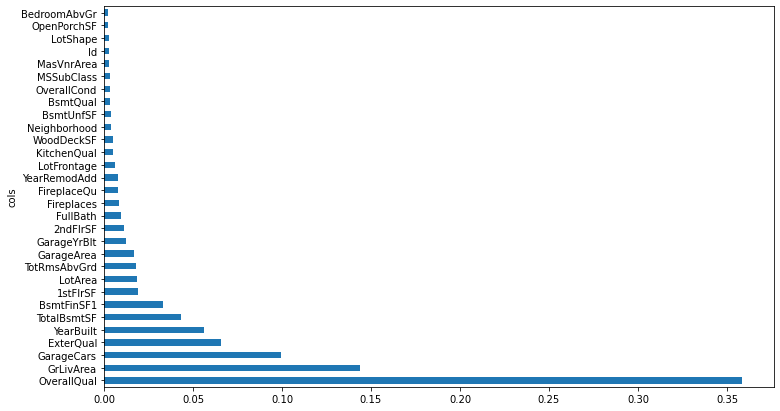

In [37]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

Analysis

In [38]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


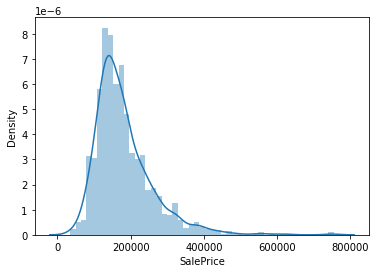

In [40]:
sns.distplot(df['SalePrice'])

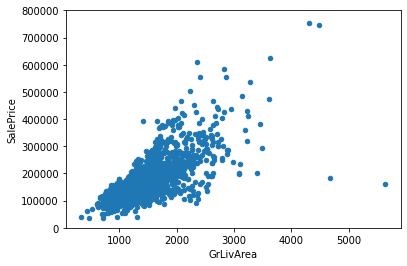

In [42]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

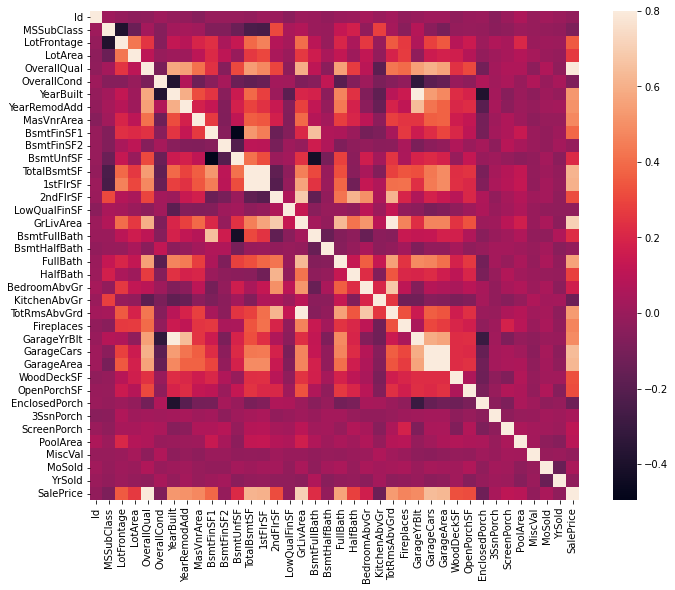

In [43]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


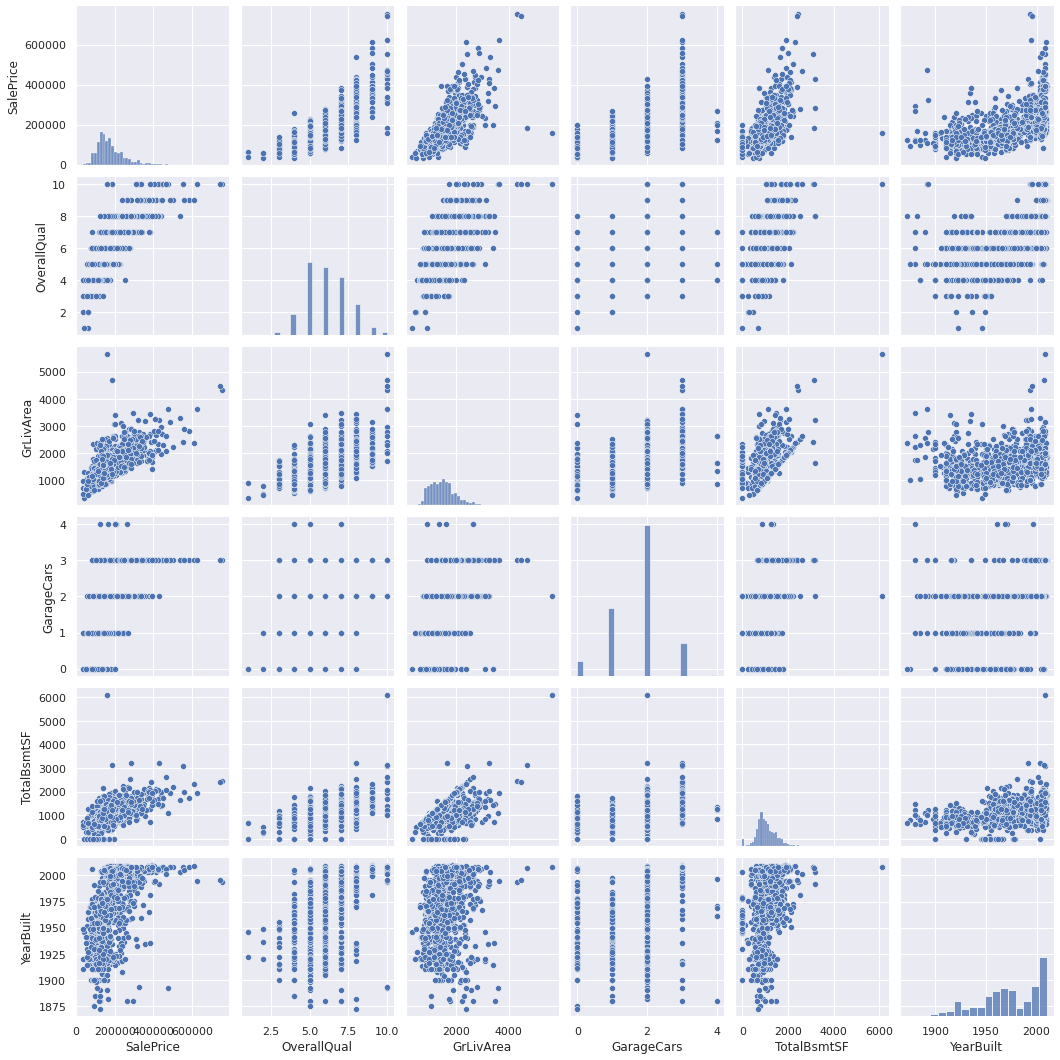

In [44]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'ExterQual', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();